In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib  inline

In [2]:
model_name='EESplit'
algo1_name='EESplit-S'
algo2_name='EESplit'

In [ ]:
def ebert_result(dataset,target,threshhold,n_layers,lembda,power=1):
    exit_layer=[0]*n_layers
    count=0
    cost=0
    for i in range(len(dataset)):
        j=0
        confidence=0
        while confidence<threshhold:
            confidence=max(dataset[i][j])
            j+=1
            if j==n_layers-1:
                break
        cost+=lembda*((j+1)**power)
        if np.argmax(dataset[i][j])==target[i]:
            count+=1
        exit_layer[j]+=1
    return exit_layer,count/len(target),cost

In [10]:
dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
threshhold = {'imdb':0.7,'scitail':0.85,'yelp':0.7,'qqp':0.75,'snli':0.75}
df_results_dict=pd.read_pickle('/home/divya/updated_code/Dataset/confidence_label_dict.pkl')
cost_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
Ebert_results={}
for dataset_name in dataset_n:
    df=df_results_dict[dataset_name.lower()].iloc[:,:-1].to_numpy()
    target=df_results_dict[dataset_name.lower()].iloc[:,-1].to_numpy()
    result=[[] for i in range(3)]
    for i in cost_list:
      sample_exit,accuracy,cos=ebert_result(df,target,threshhold[dataset_name.lower()],12,i,power=1)
      result[0].append(accuracy)
      result[1].append(cos)
      result[2].append(sample_exit)
    Ebert_results[dataset_name.lower()]=result

NameError: name 'ebert_result' is not defined

In [3]:
#to run below code please run ucb_implementation_using_side_info.py and ucb_implementation_without_using_side_information.py
with_sideInfoResults=pd.read_pickle('/home/divya/updated_code/Dataset/ucb_with_side_information.pkl')
withOut_sideInfoResults=pd.read_pickle('//home/divya/updated_code/Dataset/ucb_result_without_using_side_information.pkl')


In [5]:
# assigning the required variables for EBERT Moder
# for qqp dataset
acc_qqp=Ebert_results['qqp'][0]
cost_qqp=Ebert_results['qqp'][1]
exit_qqp=Ebert_results['qqp'][2]
# for imdb dataset
acc_imdb=Ebert_results['imdb'][0]
cost_imdb=Ebert_results['imdb'][1]
exit_imdb=Ebert_results['imdb'][2]
# for snli dataset
acc_snli=Ebert_results['snli'][0]
cost_snli=Ebert_results['snli'][1]
exit_snli=Ebert_results['snli'][2]
# for scitail dataset
acc_scitail=Ebert_results['scitail'][0]
cost_scitail=Ebert_results['scitail'][1]
exit_scitail=Ebert_results['scitail'][2]
# for yelp dataset
acc_yelp=Ebert_results['yelp'][0]
cost_yelp=Ebert_results['yelp'][1]
exit_yelp=Ebert_results['yelp'][2]



In [6]:
def plot_accuracy_cost_withSideInfo(op_list,a,threshold_datasets,cos_qqp,acc_qqp,acc_snli,cos_snli,acc_scitail,cos_scitail,acc_imdb,cos_imdb,acc_yelp,cos_yelp,dict_results=with_sideInfoResults):
    scitail_acc_thr_our=[]
    snli_acc_thr_our=[]
    imdb_acc_thr_our=[]
    qqp_acc_thr_our=[]
    yelp_acc_thr_our=[]
    scitail_cost_thr_our=[]
    snli_cost_thr_our=[] 
    imdb_cost_thr_our=[]
    qqp_cost_thr_our=[]
    yelp_cost_thr_our=[]
    scitail_opt_thr_our=[]
    snli_opt_thr_our=[]
    imdb_opt_thr_our=[]
    qqp_opt_thr_our=[]
    yelp_opt_thr_our=[]
    scitail_offload_thr_our=[]
    snli_offload_thr_our=[]
    imdb_offload_thr_our=[]
    qqp_offlaod_thr_our=[]
    yelp_offload_thr_our=[]
    
    # values from dictionaries
    imdb_results=dict_results['imdb']
    scitail_results=dict_results['scitail']
    snli_results=dict_results['snli']
    qqp_results=dict_results['qqp']
    yelp_results=dict_results['yelp']
    for op in op_list:
        
        # storation of optimal layers
        scitail_opt_thr_our.append(scitail_results[op][0])
        snli_opt_thr_our.append(snli_results[op][0])
        imdb_opt_thr_our.append(imdb_results[op][0])
        qqp_opt_thr_our.append(qqp_results[op][0])
        yelp_opt_thr_our.append(yelp_results[op][0])
        # storation of accuracies
        scitail_acc_thr_our.append(scitail_results[op][1])
        snli_acc_thr_our.append(snli_results[op][1])
        imdb_acc_thr_our.append(imdb_results[op][1])
        qqp_acc_thr_our.append(qqp_results[op][1])
        yelp_acc_thr_our.append(yelp_results[op][1])
        #storation of number of offloading at optimal layer
        scitail_offload_thr_our.append(scitail_results[op][2])
        snli_offload_thr_our.append(snli_results[op][2])
        imdb_offload_thr_our.append(imdb_results[op][2])
        qqp_offlaod_thr_our.append(qqp_results[op][2])
        yelp_offload_thr_our.append(yelp_results[op][2])
        # storation of cost 
        scitail_cost_thr_our.append(10*scitail_results[op][3])
        snli_cost_thr_our.append(10*snli_results[op][3])
        imdb_cost_thr_our.append(10*imdb_results[op][3])
        qqp_cost_thr_our.append(10*qqp_results[op][3])
        yelp_cost_thr_our.append(10*yelp_results[op][3])
    # making arrays
    scitail_acc_thr_our=np.array(scitail_acc_thr_our)
    snli_acc_thr_our=np.array(snli_acc_thr_our)
    imdb_acc_thr_our=np.array(imdb_acc_thr_our)
    qqp_acc_thr_our=np.array(qqp_acc_thr_our)
    yelp_acc_thr_our=np.array(yelp_acc_thr_our) 
    # accuracy in percenage
    scitail_acc_thr_our_per=scitail_acc_thr_our*100
    snli_acc_thr_our_per=snli_acc_thr_our*100
    imdb_acc_thr_our_per=imdb_acc_thr_our*100
    qqp_acc_thr_our_per=qqp_acc_thr_our*100
    yelp_acc_thr_our_per=yelp_acc_thr_our*100
    #cost in k
    scitail_cost_thr_our=np.array(scitail_cost_thr_our)/1000
    snli_cost_thr_our=np.array(snli_cost_thr_our)/1000
    imdb_cost_thr_our=np.array(imdb_cost_thr_our)/1000
    qqp_cost_thr_our=np.array(qqp_cost_thr_our)/1000
    yelp_cost_thr_our=np.array(yelp_cost_thr_our)/1000
    
    #Accuracy and cost in EBERT model
    scitail_acc_thr_ebert=np.array([acc_scitail[-2] for _ in range(len(op_list))])
    snli_acc_thr_ebert=np.array([acc_snli[-4] for _ in range(len(op_list))])
    imdb_acc_thr_ebert=np.array([acc_imdb[-5] for _ in range(len(op_list))])
    qqp_acc_thr_ebert=np.array([acc_qqp[-4] for _ in range(len(op_list))])
    yelp_acc_thr_ebert=np.array([acc_yelp[-5] for _ in range(len(op_list))])
    # accuracy in percentage
    scitail_acc_thr_ebert_per=np.array([acc_scitail[-2] for _ in range(len(op_list))])*100
    snli_acc_thr_ebert_per=np.array([acc_snli[-4] for _ in range(len(op_list))])*100
    imdb_acc_thr_ebert_per=np.array([acc_imdb[-5] for _ in range(len(op_list))])*100
    qqp_acc_thr_ebert_per=np.array([acc_qqp[-4] for _ in range(len(op_list))])*100
    yelp_acc_thr_ebert_per=np.array([acc_yelp[-5] for _ in range(len(op_list))])*100
    
    scitail_cost_thr_ebert=np.array([cos_scitail[-2] for _ in range(len(op_list))])/1000
    snli_cost_thr_ebert=np.array([cos_snli[-4] for _ in range(len(op_list))])/1000
    imdb_cost_thr_ebert=np.array([cos_imdb[-5] for _ in range(len(op_list))])/1000
    qqp_cost_thr_ebert=np.array([cos_qqp[-4] for _ in range(len(op_list))])/1000
    yelp_cost_thr_ebert=np.array([cos_yelp[-5] for _ in range(len(op_list))])/1000
    
    dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
    acc_ebert=[imdb_acc_thr_ebert,yelp_acc_thr_ebert,qqp_acc_thr_ebert,scitail_acc_thr_ebert,snli_acc_thr_ebert]
    acc_ebert_per=[imdb_acc_thr_ebert_per,yelp_acc_thr_ebert_per,qqp_acc_thr_ebert_per,scitail_acc_thr_ebert_per,snli_acc_thr_ebert_per]
    acc_our=[imdb_acc_thr_our,yelp_acc_thr_our,qqp_acc_thr_our,scitail_acc_thr_our,snli_acc_thr_our]
    acc_our_per=[imdb_acc_thr_our_per,yelp_acc_thr_our_per,qqp_acc_thr_our_per,scitail_acc_thr_our_per,snli_acc_thr_our_per]
    cost_ebert=[imdb_cost_thr_ebert,yelp_cost_thr_ebert,qqp_cost_thr_ebert,scitail_cost_thr_ebert,snli_cost_thr_ebert]
    cost_our_model=[imdb_cost_thr_our,yelp_cost_thr_our,qqp_cost_thr_our,scitail_cost_thr_our,snli_cost_thr_our]
    
    # print('Optimal layer on scitail dataset:',scitail_opt_thr_our)
    # print('Optimal layer on Snli dataset:',snli_opt_thr_our)
    # print('Optimal layer on imdb dataset:',imdb_opt_thr_our)
    # print('Optimal layer on qqp dataset:',qqp_opt_thr_our)
    # print('Optimal layer on scitail dataset:',yelp_opt_thr_our)
        
        
        
        
        
        
        
        
    
    

    # Create the figure
    def accuracy_plot(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo1_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        

    def cost_plot(ax_name,dataset_name,op_list,cost_our_model,cost_ebert,threshold):
        ax_name.plot(op_list,cost_ebert,linestyle='-',color='g',marker='8',label='EBERT Model')
        ax_name.plot(op_list,cost_our_model,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading cost(o)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Cost (\u00D7 $\lambda$) (in k)',fontsize=18)
        ax_name.set_title(f'Cost over {dataset_name} ({algo1_name})',fontsize=18) #with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    def accuracy_plot_per(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy (in %)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo1_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    # accuracy in % plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot_per(l[i],dataset_n[i],op_list,acc_our_per[i],acc_ebert_per[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_percentage_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    # accuracy  plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot(l[i],dataset_n[i],op_list,acc_our[i],acc_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_normal_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    #cost(in k) plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        cost_plot(l[i],dataset_n[i],op_list,cost_our_model[i],cost_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/cost_plot_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()

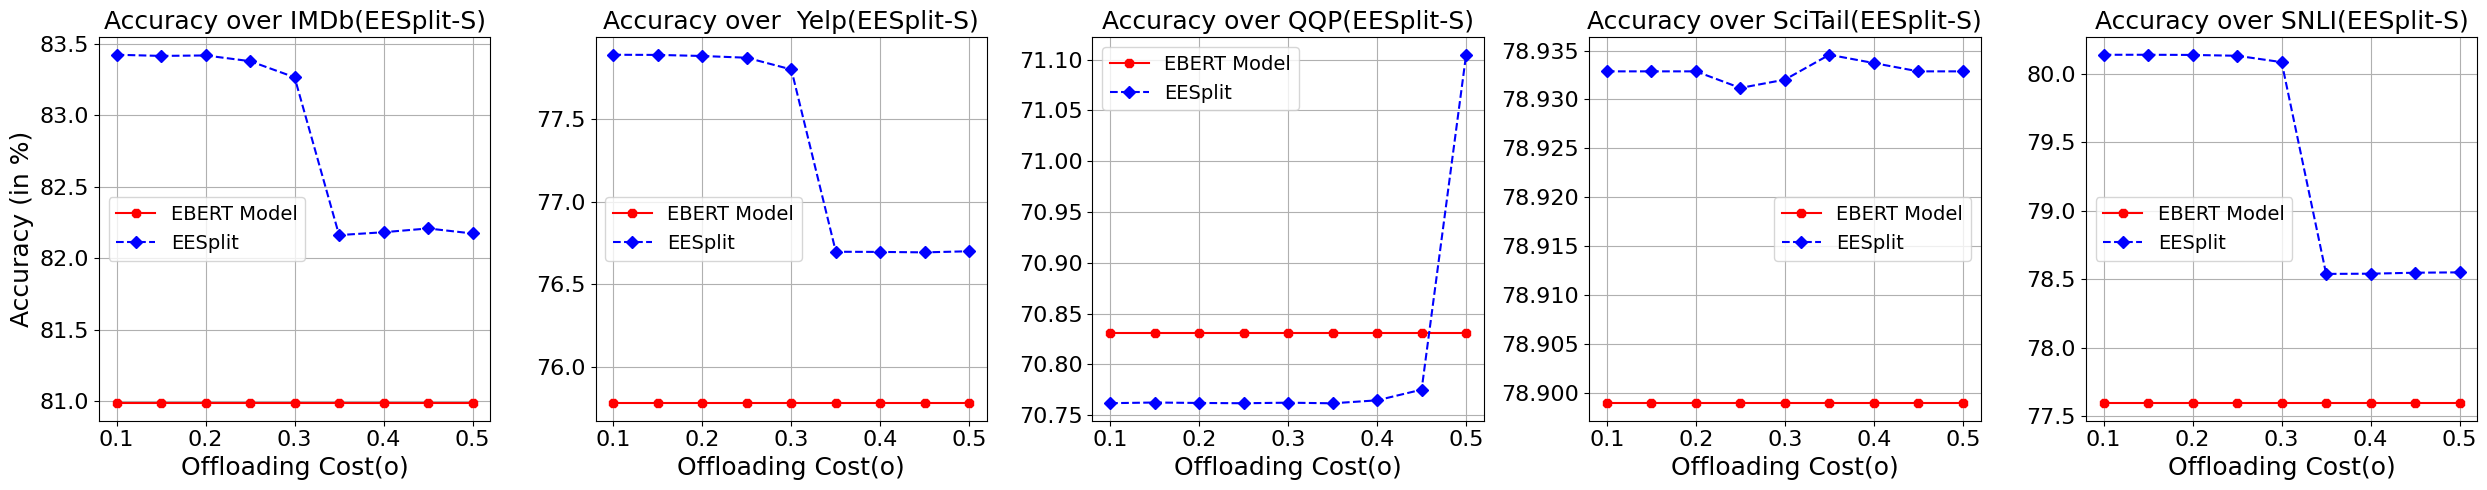

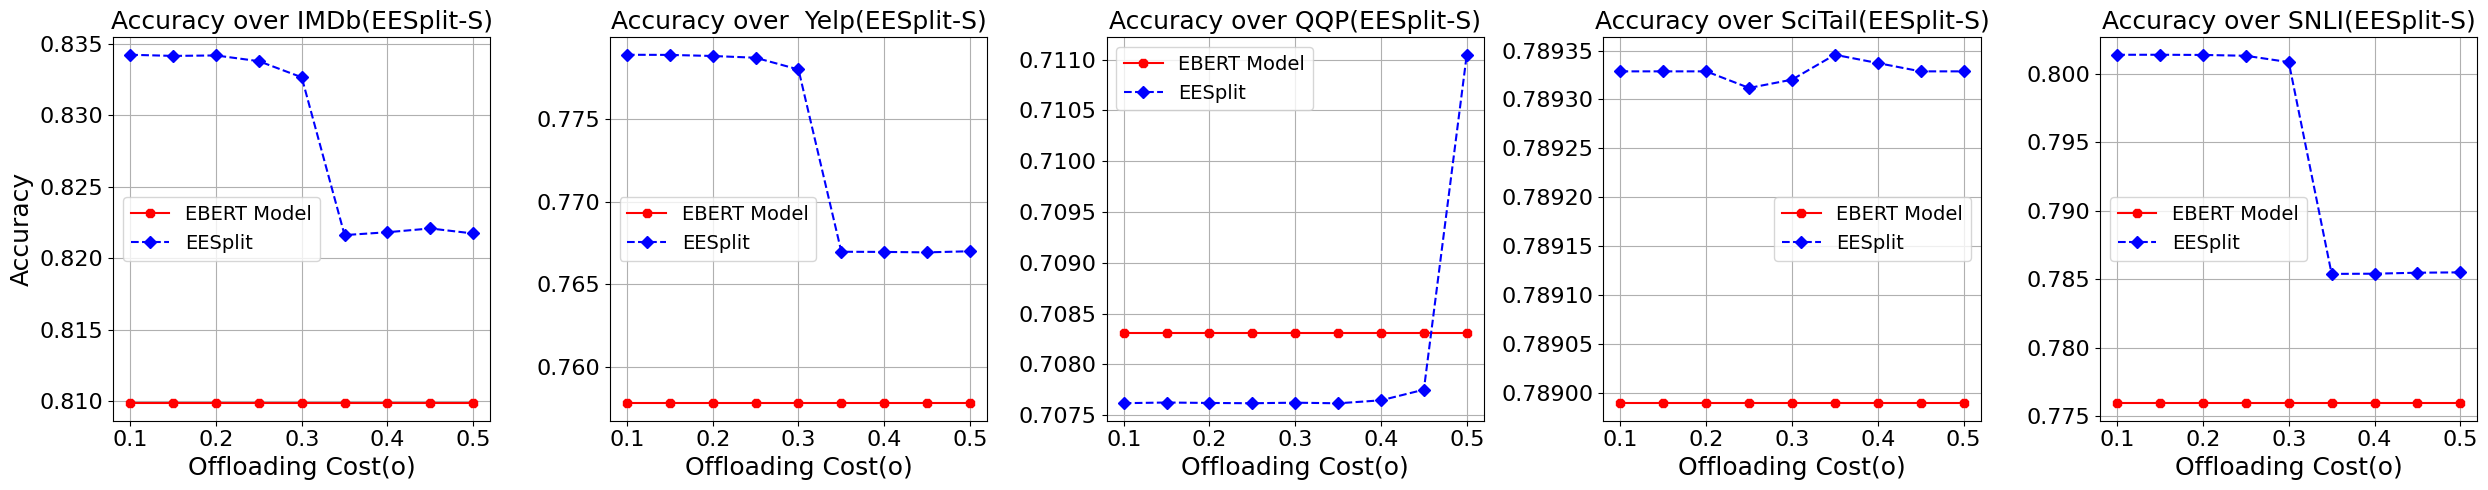

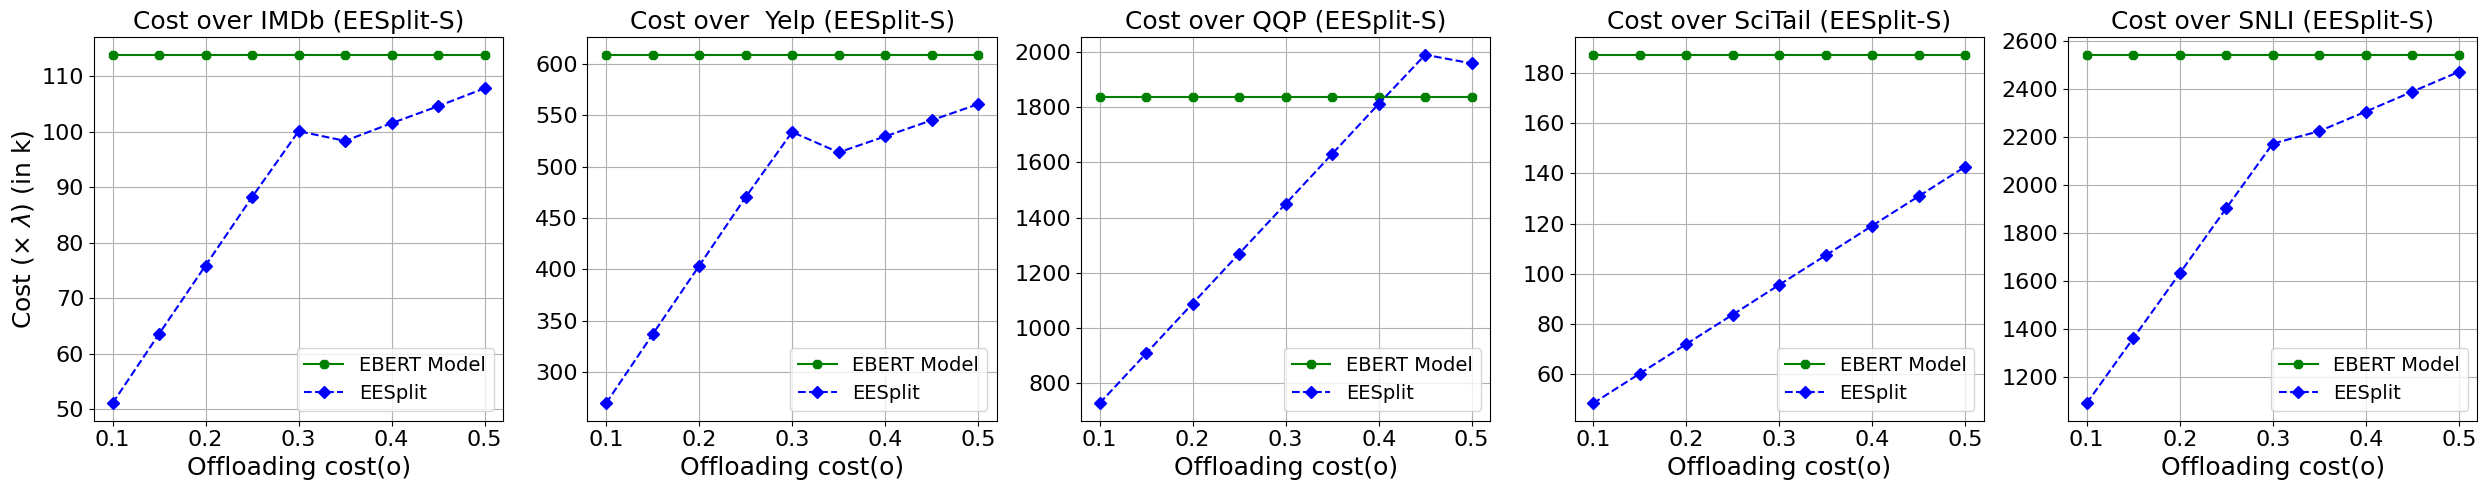

In [7]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'IMDb':0.7,'Yelp':0.7,'QQP':0.75,'SciTail':0.85,'SNLI':0.75}
plot_accuracy_cost_withSideInfo(op_list,1/10,threshold_datasets,cost_qqp,acc_qqp,acc_snli,cost_snli,acc_scitail,cost_scitail,acc_imdb,cost_imdb,acc_yelp,cost_yelp,dict_results=with_sideInfoResults)

In [8]:
def plot_accuracy_cost_withOutSideInfo(op_list,a,threshold_datasets,cos_qqp,acc_qqp,acc_snli,cos_snli,acc_scitail,cos_scitail,acc_imdb,cos_imdb,acc_yelp,cos_yelp,dict_results=withOut_sideInfoResults):
    scitail_acc_thr_our=[]
    snli_acc_thr_our=[]
    imdb_acc_thr_our=[]
    qqp_acc_thr_our=[]
    yelp_acc_thr_our=[]
    scitail_cost_thr_our=[]
    snli_cost_thr_our=[] 
    imdb_cost_thr_our=[]
    qqp_cost_thr_our=[]
    yelp_cost_thr_our=[]
    scitail_opt_thr_our=[]
    snli_opt_thr_our=[]
    imdb_opt_thr_our=[]
    qqp_opt_thr_our=[]
    yelp_opt_thr_our=[]
    scitail_offload_thr_our=[]
    snli_offload_thr_our=[]
    imdb_offload_thr_our=[]
    qqp_offlaod_thr_our=[]
    yelp_offload_thr_our=[]
    
    # values from dictionaries
    imdb_results=dict_results['imdb']
    scitail_results=dict_results['scitail']
    snli_results=dict_results['snli']
    qqp_results=dict_results['qqp']
    yelp_results=dict_results['yelp']
    for op in op_list:
        
        # storation of optimal layers
        scitail_opt_thr_our.append(scitail_results[op][0])
        snli_opt_thr_our.append(snli_results[op][0])
        imdb_opt_thr_our.append(imdb_results[op][0])
        qqp_opt_thr_our.append(qqp_results[op][0])
        yelp_opt_thr_our.append(yelp_results[op][0])
        # storation of accuracies
        scitail_acc_thr_our.append(scitail_results[op][1])
        snli_acc_thr_our.append(snli_results[op][1])
        imdb_acc_thr_our.append(imdb_results[op][1])
        qqp_acc_thr_our.append(qqp_results[op][1])
        yelp_acc_thr_our.append(yelp_results[op][1])
        #storation of number of offloading at optimal layer
        scitail_offload_thr_our.append(scitail_results[op][2])
        snli_offload_thr_our.append(snli_results[op][2])
        imdb_offload_thr_our.append(imdb_results[op][2])
        qqp_offlaod_thr_our.append(qqp_results[op][2])
        yelp_offload_thr_our.append(yelp_results[op][2])
        # storation of cost 
        scitail_cost_thr_our.append(10*scitail_results[op][3])
        snli_cost_thr_our.append(10*snli_results[op][3])
        imdb_cost_thr_our.append(10*imdb_results[op][3])
        qqp_cost_thr_our.append(10*qqp_results[op][3])
        yelp_cost_thr_our.append(10*yelp_results[op][3])
    # making arrays
    scitail_acc_thr_our=np.array(scitail_acc_thr_our)
    snli_acc_thr_our=np.array(snli_acc_thr_our)
    imdb_acc_thr_our=np.array(imdb_acc_thr_our)
    qqp_acc_thr_our=np.array(qqp_acc_thr_our)
    yelp_acc_thr_our=np.array(yelp_acc_thr_our) 
    # accuracy in percenage
    scitail_acc_thr_our_per=scitail_acc_thr_our*100
    snli_acc_thr_our_per=snli_acc_thr_our*100
    imdb_acc_thr_our_per=imdb_acc_thr_our*100
    qqp_acc_thr_our_per=qqp_acc_thr_our*100
    yelp_acc_thr_our_per=yelp_acc_thr_our*100
    #cost in k
    scitail_cost_thr_our=np.array(scitail_cost_thr_our)/1000
    snli_cost_thr_our=np.array(snli_cost_thr_our)/1000
    imdb_cost_thr_our=np.array(imdb_cost_thr_our)/1000
    qqp_cost_thr_our=np.array(qqp_cost_thr_our)/1000
    yelp_cost_thr_our=np.array(yelp_cost_thr_our)/1000
    
    #Accuracy and cost in EBERT model
    scitail_acc_thr_ebert=np.array([acc_scitail[-2] for _ in range(len(op_list))])
    snli_acc_thr_ebert=np.array([acc_snli[-4] for _ in range(len(op_list))])
    imdb_acc_thr_ebert=np.array([acc_imdb[-5] for _ in range(len(op_list))])
    qqp_acc_thr_ebert=np.array([acc_qqp[-4] for _ in range(len(op_list))])
    yelp_acc_thr_ebert=np.array([acc_yelp[-5] for _ in range(len(op_list))])
    # accuracy in percentage
    scitail_acc_thr_ebert_per=np.array([acc_scitail[-2] for _ in range(len(op_list))])*100
    snli_acc_thr_ebert_per=np.array([acc_snli[-4] for _ in range(len(op_list))])*100
    imdb_acc_thr_ebert_per=np.array([acc_imdb[-5] for _ in range(len(op_list))])*100
    qqp_acc_thr_ebert_per=np.array([acc_qqp[-4] for _ in range(len(op_list))])*100
    yelp_acc_thr_ebert_per=np.array([acc_yelp[-5] for _ in range(len(op_list))])*100
    
    scitail_cost_thr_ebert=np.array([cos_scitail[-2] for _ in range(len(op_list))])/1000
    snli_cost_thr_ebert=np.array([cos_snli[-4] for _ in range(len(op_list))])/1000
    imdb_cost_thr_ebert=np.array([cos_imdb[-5] for _ in range(len(op_list))])/1000
    qqp_cost_thr_ebert=np.array([cos_qqp[-4] for _ in range(len(op_list))])/1000
    yelp_cost_thr_ebert=np.array([cos_yelp[-5] for _ in range(len(op_list))])/1000
    
    dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
    acc_ebert=[imdb_acc_thr_ebert,yelp_acc_thr_ebert,qqp_acc_thr_ebert,scitail_acc_thr_ebert,snli_acc_thr_ebert]
    acc_ebert_per=[imdb_acc_thr_ebert_per,yelp_acc_thr_ebert_per,qqp_acc_thr_ebert_per,scitail_acc_thr_ebert_per,snli_acc_thr_ebert_per]
    acc_our=[imdb_acc_thr_our,yelp_acc_thr_our,qqp_acc_thr_our,scitail_acc_thr_our,snli_acc_thr_our]
    acc_our_per=[imdb_acc_thr_our_per,yelp_acc_thr_our_per,qqp_acc_thr_our_per,scitail_acc_thr_our_per,snli_acc_thr_our_per]
    cost_ebert=[imdb_cost_thr_ebert,yelp_cost_thr_ebert,qqp_cost_thr_ebert,scitail_cost_thr_ebert,snli_cost_thr_ebert]
    cost_our_model=[imdb_cost_thr_our,yelp_cost_thr_our,qqp_cost_thr_our,scitail_cost_thr_our,snli_cost_thr_our]
    
    # print('Optimal layer on scitail dataset:',scitail_opt_thr_our)
    # print('Optimal layer on Snli dataset:',snli_opt_thr_our)
    # print('Optimal layer on imdb dataset:',imdb_opt_thr_our)
    # print('Optimal layer on qqp dataset:',qqp_opt_thr_our)
    # print('Optimal layer on scitail dataset:',yelp_opt_thr_our)
        
        
        
        
        
        
        
        
    
    

    # Create the figure
    def accuracy_plot(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name} ({algo2_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        

    def cost_plot(ax_name,dataset_name,op_list,cost_our_model,cost_ebert,threshold):
        ax_name.plot(op_list,cost_ebert,linestyle='-',color='g',marker='8',label='EBERT Model')
        ax_name.plot(op_list,cost_our_model,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading cost(o)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Cost (\u00D7 $\lambda$) (in k)',fontsize=18)
        ax_name.set_title(f'Cost over {dataset_name} ({algo2_name})',fontsize=18) #with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    def accuracy_plot_per(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy (in %)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo2_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    # accuracy in % plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot_per(l[i],dataset_n[i],op_list,acc_our_per[i],acc_ebert_per[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_percentage_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    # accuracy  plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot(l[i],dataset_n[i],op_list,acc_our[i],acc_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_normal_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    #cost(in k) plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        cost_plot(l[i],dataset_n[i],op_list,cost_our_model[i],cost_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/cost_plot_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()

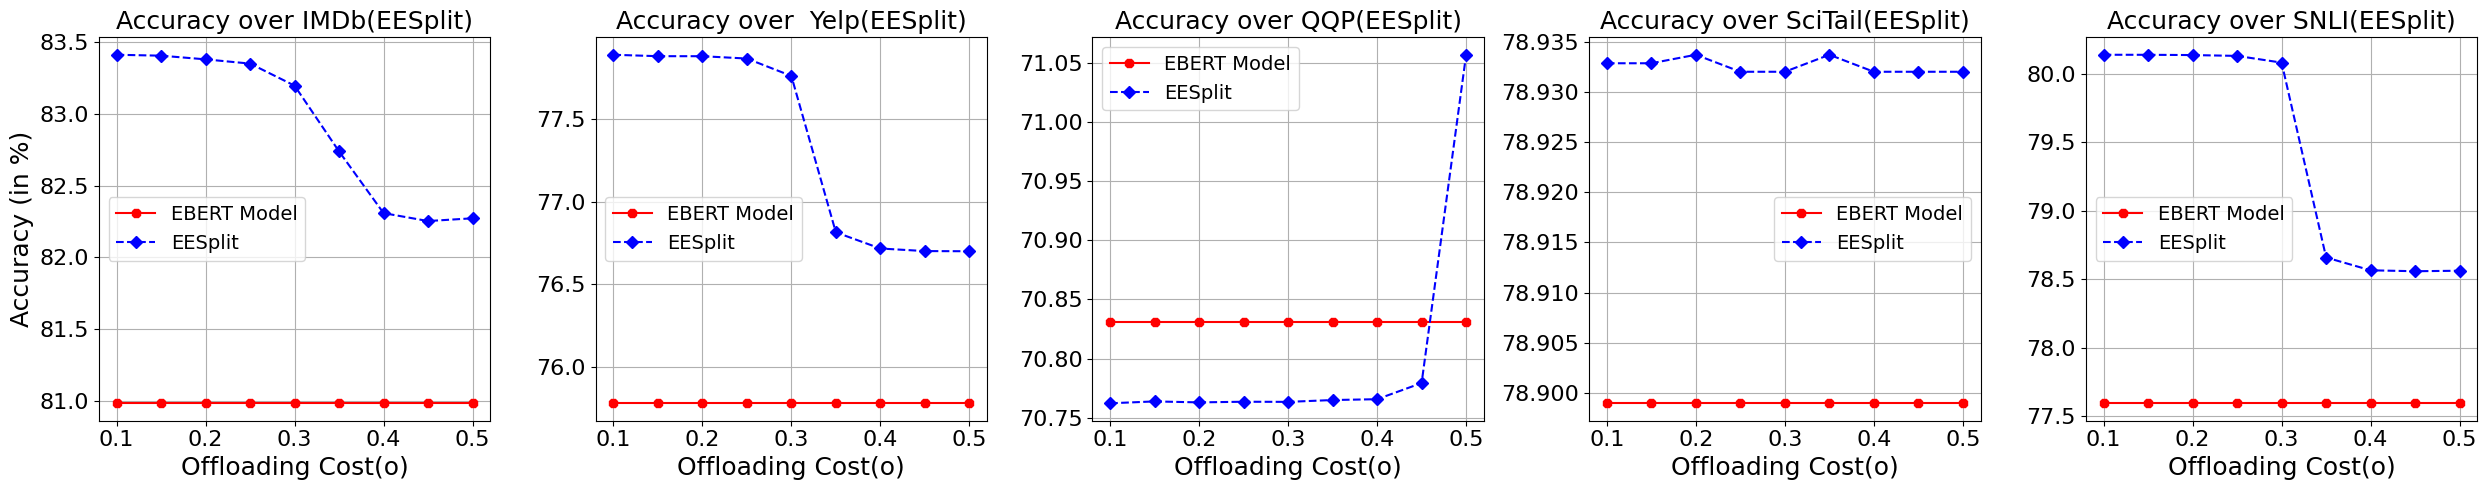

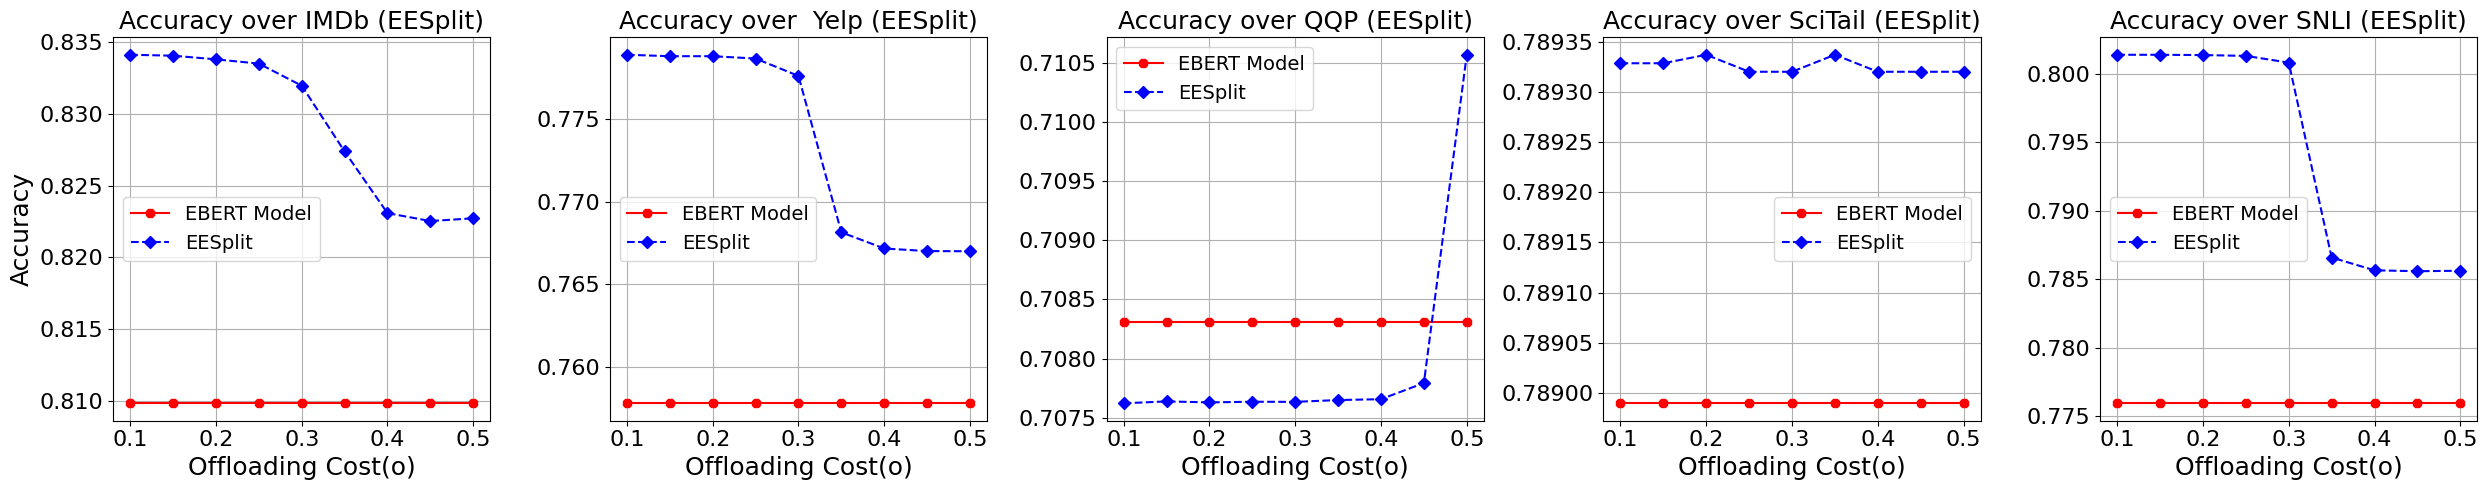

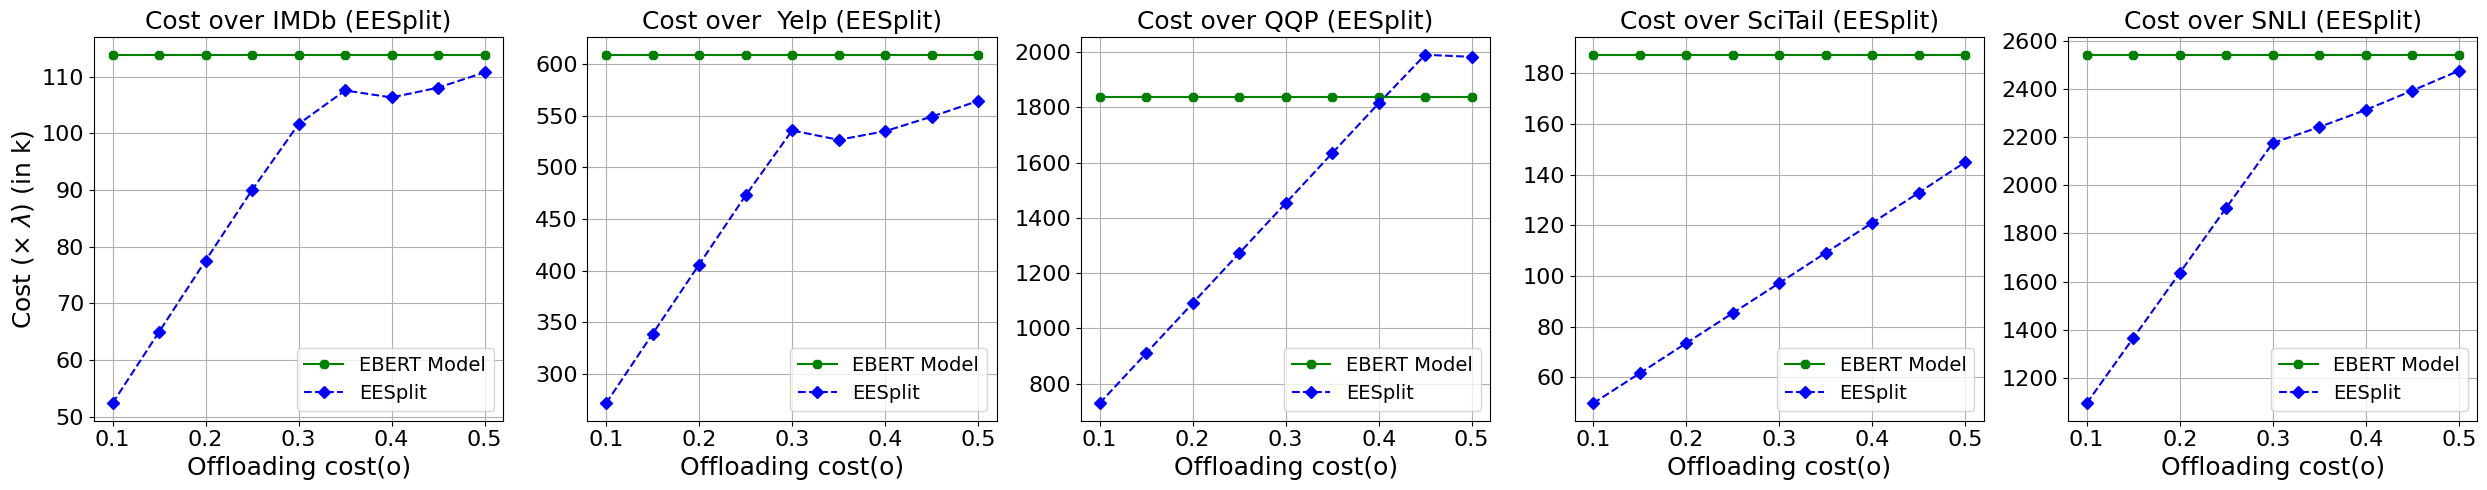

In [9]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'IMDb':0.7,'Yelp':0.7,'QQP':0.75,'SciTail':0.85,'SNLI':0.75}
plot_accuracy_cost_withOutSideInfo(op_list,1/10,threshold_datasets,cost_qqp,acc_qqp,acc_snli,cost_snli,acc_scitail,cost_scitail,acc_imdb,cost_imdb,acc_yelp,cost_yelp)